<h2>Taller 1 - Clasificador MPL para identificar dígitos manuscritos</h2><br>
Ejemplo de implementación de una red neuronal con Scikit-learn. <a href="https://scikit-learn.org/">https://scikit-learn.org/</a><br> 
<b>The digit dataset</b><br>
Base de datos de 250 muestras tomadas de 44 personas diferentes<br>
Origen: <a href="http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits">http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits</a>
<br>Código Fuente: Gaël Varoquaux
<br>Modificado para documentación por Jaques Grobler
<br>Ejemplo de aplicación: Claudio Morales D.

In [1]:
# Requiere: scikit-learn, numpy, SciPy
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#Cargar el set de datos
digits = datasets.load_digits()

In [3]:
# digits es un arreglo de elementos diversos (utils.Bunch)
type(digits)

sklearn.utils.Bunch

In [4]:
# La base de datos se compone de imagenes de dígitos y su dígito correspondiente.
# las imágenes se almacenan en el atributo 'images' del set de datos
print(digits.images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

In [5]:
# Para cada imagen, sabemos qué dígito representa a partir del atributo 'target'
print(digits.target)

[0 1 2 ... 8 9 8]


In [6]:
# ¿Cuántos elementos contienen estos campos?
print("Elementos en digits.images = ", len(digits.images))
print("Elementos en digits.target = ", len(digits.target))

('Elementos en digits.images = ', 1797)
('Elementos en digits.target = ', 1797)


In [7]:
#¿Cuál es el primer dígito del dataset?
print(digits.images[0])
print(digits.target[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


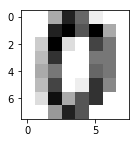

In [19]:
#Podemos visualizar la matriz como una imagen
plt.figure(figsize=(2, 2))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.show()

In [ ]:
#¿Cuál es el segundo dígito del dataset?
#------COMPLETAR-------#

178


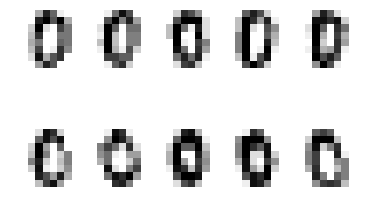

In [14]:
# ¿Cuántos dígitos cero hay en el dataset?

images=[]
for i in range(len(digits.target)):
    if digits.target[i] == 0:
        images.append(digits.images[i])

print(len(images))

# Visualizamos los primeros 10
for index in range(0,10):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(images[index], cmap=plt.cm.gray_r)

plt.show()

In [15]:
# ¿Cuántas muestras hay de cada dígito?
import numpy
muestras = numpy.zeros(10)

for i in range(len(digits.target)):
    for digito in range(10):
            if digits.target[i] == digito:
                muestras[digito] += 1

print(muestras)

[178. 182. 177. 183. 181. 182. 181. 179. 174. 180.]


<h3>2. Creando y entrenando la red</h3>

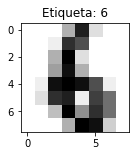

In [27]:
#tomamos nuestro set de datos desde 'digits'
imagenes = digits.images
etiquetas = digits.target

index = 34

plt.figure(figsize=(2, 2))
plt.imshow(imagenes[index], cmap=plt.cm.gray_r)
plt.title('Etiqueta: %i' % etiquetas[index])
plt.show()

In [28]:
# Para aplicar un clasificador sobre estos datos es necesario "aplanar" las imágenes,
# a fin de poner la información en forma de vector:
datos = imagenes.reshape((len(imagenes), -1))

In [29]:
# La primera imagen es:
imagenes[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [30]:
# El primer dato "aplanado" es
datos[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [31]:
# Ahora normalizamos los datos
datos = datos/15. # Transforma el rango 0-15 en un rango 0-1.

In [32]:
# El primer dato normalizado que ingresará al clasificador es
datos[0]

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

In [36]:
# Crearemos una red neuronal para un clasificador multicapa (Multi-Layer Perceptron)
# La documentación sobre los parámetros puede encontrarla aquí:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(64,), 
                    max_iter=100, learning_rate_init=.1)

# Entrenamos la red con n datos
n = 898
mlp.fit(datos[:n], etiquetas[:n])

# Verificamos sus predicciones para los datos restantes
esperado = etiquetas[n:]
prediccion = mlp.predict(datos[n:])

# Y mostramos los resultados.
from sklearn import metrics
print("Reporte del clasificador: \n %s\n %s\n" 
      %(mlp, metrics.classification_report(esperado, prediccion)))
print("Matriz de confusión:\n%s" % metrics.confusion_matrix(esperado, prediccion))


Reporte del clasificador: 
 MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.94      0.89      0.92        91
           2       0.99      1.00      0.99        86
           3       0.94      0.93      0.94        91
           4       0.97      0.95      0.96        92
           5       0.91      0.97      0.94        91
           6       0.97      0.99      0.98        91
           7       0.94      0.93      0.94        89
           8       0.96      0.9

La documentación sobre las métricas de sklearn se encuentra aquí:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
<br>Y la explicación de la matriz de confusión la encuentra aquí:
https://en.wikipedia.org/wiki/Confusion_matrix

In [37]:
# ¿Cuáles fueron los datos erróneos?
erroneos = []
for i in range(len(prediccion)):
    if esperado[i] != prediccion[i]:
        erroneos.append([esperado[i],prediccion[i]])

erroneos

[[8, 1],
 [7, 3],
 [5, 9],
 [7, 5],
 [9, 3],
 [4, 9],
 [7, 5],
 [8, 1],
 [8, 9],
 [8, 5],
 [8, 5],
 [3, 7],
 [1, 6],
 [1, 8],
 [1, 9],
 [4, 0],
 [5, 6],
 [1, 9],
 [1, 9],
 [1, 9],
 [1, 9],
 [8, 3],
 [1, 9],
 [1, 0],
 [1, 9],
 [8, 5],
 [9, 7],
 [6, 1],
 [7, 9],
 [8, 1],
 [9, 7],
 [9, 7],
 [0, 4],
 [9, 5],
 [0, 6],
 [7, 4],
 [4, 9],
 [5, 4],
 [4, 1],
 [7, 3],
 [9, 8],
 [4, 9],
 [9, 5],
 [8, 3],
 [3, 8],
 [3, 7],
 [3, 2],
 [3, 5],
 [3, 5]]

<h3>Taller 1: Entrenando la red neuronal</h3>
A partir del ejemplo, y utilizando los parámetros por defecto, ejercite con distintas proporciones entre datos de entrenamiento y datos para validación.<br>
1. ¿Cuál es la mínima cantidad de datos de entrenamiento que permiten una precisión por encima de 0.9 para cada dígito leído?<br>
2. ¿Es posible alcanzar una precisión por encima de 0.95 para cada dígito leído?¿Con cuántos datos?<br>
3. Utilizando la mitad de los datos para entrenamiento, varíe los parámetros del clasificador. ¿Qué efecto tienen el cambio de la función de activación, el número de capas ocultas, el número de iteraciones y la tasa de aprendizaje?